In [2]:
#export
from fastai.vision.all import *
import gradio as gr

In [4]:
#export
learn = load_learner('/kaggle/input/arthopod_identifier_model/other/default/1/Artho_train_model.pkl')

In [5]:
!pip install -Uqq ddgs

from ddgs import DDGS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.6 MB/s eta 0:00:0000:0100:01


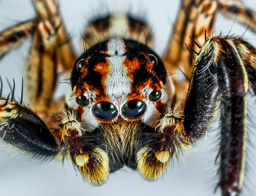

In [6]:
def search_images(keywords, max_images=150):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

from fastdownload import download_url

download_url(search_images('spider photos', max_images=30)[0], 'random.jpg', show_progress=False)
#download_url(search_images('box photos', max_images=50)[10], 'random_picture.jpg', show_progress=False)
Image.open('random.jpg').to_thumb(256,256)

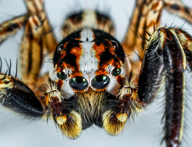

In [7]:
im = PILImage.create('random.jpg')
im.thumbnail((192, 192))
im

In [8]:
#export1

categories = learn.dls.vocab

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [9]:
#im = PILImage.create('random.jpg')  # don't alter it
classify_image(im)

{'Arachnida': 0.9995610117912292,
 'Chilopoda': 0.00014934946375433356,
 'Crustacea': 0.00015966128557920456,
 'Diplopoda': 1.2711966519418638e-05,
 'Insecta': 0.00011723590432666242}

In [10]:
#export1
image=gr.Image(height=192, width=192)
label=gr.Label()
examples = ['random.jpg']

# Create the Gradio interface
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)

# Launch the interface
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://b63ed7ba098f0e4a76.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [11]:
#export2
categories = learn.dls.vocab

def classify_image2(img):
    pred, idx, probs = learn.predict(img)
    if probs[idx] > 0.5:
        return str(pred)
    else:
        return "inconclusive"

In [12]:
classify_image2(im)

'Arachnida'

In [13]:
#export2
image=gr.Image(height=192, width=192)
label=gr.Label()
examples = ['random.jpg']

# Create the Gradio interface
intf = gr.Interface(fn=classify_image2, inputs=image, outputs=label, examples=examples)

# Launch the interface
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7861
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://c145fef2ad0343a64e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


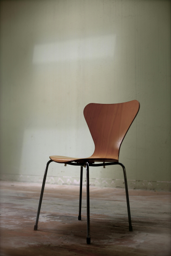

In [14]:
download_url(search_images('chair photos', max_images=30)[0], 'cat.jpg', show_progress=False)
#download_url(search_images('box photos', max_images=50)[10], 'random_picture.jpg', show_progress=False)
Image.open('cat.jpg').to_thumb(256,256)

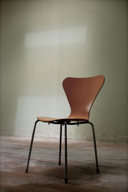

In [15]:
im2 = PILImage.create('cat.jpg')
im2.thumbnail((192, 192))
im2

In [16]:
classify_image2(im2)

'inconclusive'